##### <a id='top'></a>

# Homework 4: Confidence intervals and other things
***

**Name**: Muntaha Pasha

***

This assignment is due on Moodle by **11:59 PM on Friday November 8**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Are sea-levels changing?

You have been contacted by the local government of New York City, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file (posted on Canvas).

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save NYC and the Statue of Liberty from a watery fate?

In [3]:
# Local and web paths to the data; pick which works for you.
filepath = "sealevel_newyork.csv"

dfSL = pd.read_csv(filepath, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head(50)

,Year,Month,Day,SL
0,1920,6,2,1593
1,1920,6,3,1605
2,1920,6,4,1617
3,1920,6,5,1779
4,1920,6,6,1722
5,1920,6,7,1594
6,1920,6,8,1639
7,1920,6,9,1699
8,1920,6,10,1690
9,1920,6,11,1622


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

**SOURCES USED:**

1 - (DF Inplace Function) https://stackoverflow.com/questions/43893457/python-pandas-understanding-inplace-true

2 - (Numpy NaN) https://stackoverflow.com/questions/41342609/the-difference-between-comparison-to-np-nan-and-isnull

In [27]:
def clean_data(df):
    #First you wanna make a clean copy of the DataFrame so we are only modifying the copy and not the Original.
    dfClean = df.copy()
    #Now we want to get the values that have replaced missing sea level data
    getVals = dfClean.loc[dfClean["SL"] < -5000, "SL"].median()
    dfClean.loc[dfClean["SL"]==getVals, "SL"] = np.nan
    #Here we want to remove all the missing rows of data using the dropna.
    dfClean.dropna(subset=["SL"], inplace=True)
    #Get the second day.
    secDay = dfClean.index[dfClean["Day"]==2]
    #locate and get that.
    dfClean = dfClean.loc[secDay, :]
    return dfClean

dfClean = clean_data(dfSL)
dfClean.head(50)

,Year,Month,Day,SL
0,1920,6,2,1593.0
30,1920,7,2,1710.0
61,1920,8,2,1662.0
92,1920,9,2,1585.0
122,1920,10,2,1521.0
153,1920,11,2,1704.0
183,1920,12,2,1398.0
214,1921,1,2,1686.0
245,1921,2,2,1530.0
273,1921,3,2,1541.0


In [28]:
len(dfClean)

1003

**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 1 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 


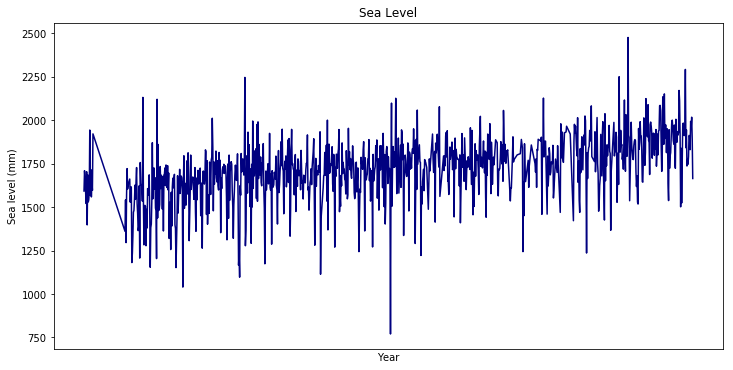

In [29]:
#First let's look at January 1st of every year that is divisible by 10 with the following line.
tickMarks = dfClean.index[(dfClean["Month"]==1) & (dfClean["Day"]==1) & (dfClean["Year"]%10==0)]
#Now we can plot our graph.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
#Plot the Data Frame, and use the color green to plot it.
dfClean["SL"].plot(color="navy")
ax.set_xticks(tickMarks)
ax.set_xticklabels(dfClean.loc[tickMarks, "Year"])
ax.set_xlabel('Year')
ax.set_ylabel('Sea level (mm)')
ax.set_title('Sea Level');

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each of the two decades of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

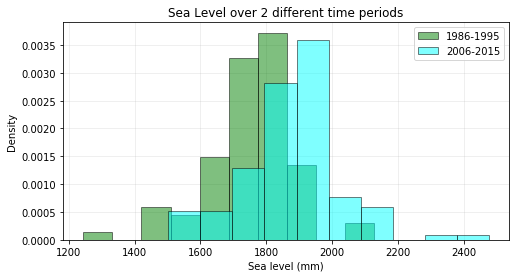

The mean for 1986-1995 is...1747.6052631578948
The mean for 2006-2015 is...1879.1666666666667


In [30]:
#Get the variables we need, so the starting year and the duration of the time. I'm starting from 1985 instead of 1986
#for the comparison in my dfOld definition.
firstStart = 1985
lenYears = 10
#Make a copy of the clean dataframe.
dfOld = dfClean.copy()
#Put the following information inside of it, and filter it based off these requirements.
dfOld = dfOld.loc[(dfOld["Year"]>firstStart) & (dfOld["Year"]<=(firstStart+lenYears)), "SL"]
#Now we need the variable for the starting year of the second period. Again, I'm starting from 2005 instead of 2006 
#for the comparison I make in my df declaration.
secStart = 2005
#Make a copy of the clean dataframe.
dfNew = dfClean.copy()
#Put in the new dataframe all the information from 2006 to 2015.
dfNew = dfNew.loc[(dfNew["Year"]>secStart) & (dfNew["Year"]<=(secStart+lenYears)), "SL"]
#Now plot our graph.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
#Make the histograms of the older set of data and the newer set of data.
dfOld.hist(alpha=0.5, edgecolor="black", density=True, color="green", label = "1986-1995")
dfNew.hist(alpha=0.5, edgecolor="black", density=True, color = "cyan", label = "2006-2015")
#Set axis labels.
ax.set_xlabel('Sea level (mm)')
ax.set_ylabel('Density')
ax.set_title("Sea Level over 2 different time periods")
#Set the color amount, make it slightly more transparent.
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.legend()
plt.show()
#Calculate the mean for each dataframes and output them below the chart for comparison.
print("The mean for 1986-1995 is...{}".format(dfOld.mean()))
print("The mean for 2006-2015 is...{}".format(dfNew.mean()))

**PART C (Solution):**

The mean sea level for 2006-2015 is higher than the previous sea level mean from 1986-1995. This shows that the mean sea-level is indeed increasing. $\checkmark$

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

**PART D (Solution):**

We can write our 99.9% confidence interval with ($\alpha=0.001$) for our $\mu$ as the following...

$$CI_{Past} = \bar{X}_{1986} \pm Z_{0.001/2} \frac{S_{1986}}{\sqrt{n_{1986}}}$$

$$CI_{Recent} = \bar{X}_{2006} \pm Z_{0.001/2} \frac{S_{2006}}{\sqrt{n_{2006}}}$$

In [8]:
#Getting some variables here.
print("{:.3f}".format(stats.norm.ppf(1-.001/2)))
print("----------------")
print("{:.3f}".format(np.sqrt(dfOld.var(ddof=1))))
print("{:.3f}".format(np.sqrt(dfNew.var(ddof=1))))
print("----------------")
print("dfOld Count...{}".format(dfOld.count()))
print("dfNew Count...{}".format(dfNew.count()))
print("----------------")
print("dfOld Mean...{:.3f}".format(dfOld.mean()))
print("dfNew Mean...{:.3f}".format(dfNew.mean()))
print("----------------")
#Printing the second part of the CI.
print(stats.norm.ppf(1-.001/2)*dfOld.std(ddof=1)/np.sqrt(dfOld.count()))
print(stats.norm.ppf(1-.001/2)*dfNew.std(ddof=1)/np.sqrt(dfNew.count()))

3.291
----------------
138.857
152.846
----------------
dfOld Count...76
dfNew Count...120
----------------
dfOld Mean...1747.605
dfNew Mean...1879.167
----------------
52.41142658405504
45.91213818254121


So our 99% confidence interval for $\mu_{1986}$ would be like so...

$$CI_{Past} = 1747.605 \pm 3.291 \cdot \frac{138.857}{\sqrt{76}}$$

$$CI_{Past} = 1747.605 \pm 52.419$$

$$CI_{Past} = [1695.186, 1800.024] \checkmark$$

Now our 99% confidence interval for $\mu_{2006}$ is like...

$$CI_{Past} = 1879.167 \pm 3.291 \cdot \frac{152.846}{\sqrt{120}}$$

$$CI_{Past} = 1879.167 \pm 45.918$$

$$CI_{Past} = [1833.249, 1925.085] \checkmark$$

In [9]:
#Alpha variable
alpha = 0.001
#Critical value (z)
z_crit = stats.norm.ppf(1-alpha/2)
#Taking the second part of the interval
se1986 = dfOld.std(ddof=1)/np.sqrt(dfOld.count())
#Storing average of the 1985 dataframe.
x_barO = dfOld.mean()
#Now takew the confidence interval by putting all of the parts together.
conInterval_1986 = (x_barO - z_crit * se1986, x_barO + z_crit * se1986)
#Print the confidence interval
print("The 1986-1995 Confidence interval is...[{:.2f}, {:.2f}]".format(conInterval_1986[0], conInterval_1986[1]))
#Now doing the same thing as above for this new time interval.
se2006 = dfNew.std(ddof=1)/np.sqrt(dfNew.count())
#Find the mean of the recent dataframe
x_barN = dfNew.mean()
#Find the confidence interval for the 2006-2015
conInterval_2006 = (x_barN - z_crit * se2006, x_barN + z_crit * se2006)
#Print the confidence interval
print("The 2006-2015 Confidence interval is...[{:.2f}, {:.2f}]".format(conInterval_2006[0], conInterval_2006[1]))

The 1986-1995 Confidence interval is...[1695.19, 1800.02]
The 2006-2015 Confidence interval is...[1833.25, 1925.08]


In Conclusion, we have good evidence to make the conclusion that there is a noticeable difference in the mean sea level between 1986-1995 versus the mean sea level between 2006-2015 given that our interval of 1985-1995 is before the interval of 2006-2015. $\checkmark$

**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

**PART E (Solution):**

We can find a 99.9% confidence interval for $\mu_{2006-2015} - \mu_{1986-1995}$ by doing the following...

$$CI =\bar{X}_{2006} - \bar{X}_{1986} \pm Z_{0.001/2}\sqrt{\frac{S^2_{2006}}{n_{2006}}+ \frac{S^2_{1986}}{n_{1986}}}$$

We will have two $\bar{X}$'s now, and we will also have two terms now in our square root. 

In [10]:
seDif = np.sqrt((dfNew.var(ddof=1)/dfNew.count()) + (dfOld.var(ddof=1)/dfOld.count()))
x_barD = dfNew.mean()-dfOld.mean()
lowBound = x_barD - z_crit*seDif
upBound = x_barD + z_crit*seDif
print("The Confidence Interval for the Difference in Means is... [{:0.2f}, {:0.2f}]".format(lowBound,upBound))

The Confidence Interval for the Difference in Means is... [61.88, 201.24]


Given that our 99.9% confidence interval for the difference in means doesn't cover the number 0, it means that at the 99.9% confidence level there is a significant difference in the means, statistically speaking. $\checkmark$

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

**PART F (Solution):**

There seems to be a very clear trend in our sea level data over a time period. That means the measuremements aren't going to be distributed identically to one another because this specific distribution over a function of time would likely be changing the mean.

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Waiting for the Bus

You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

**SOURCES USED:**

1 - (Null Hypotheses) https://365datascience.com/null-hypothesis/

**PART A (Solution):**

We denote Null Hypothesis as $H_0$, and the Alternative Hypothesis as $H_a$. 

We will use a One-Tailed Test. Our Hypotheses become the following...

$H_0$: The mean waiting time is less than or equal to 10 minutes. (i.e, $\mu \leq 10$)

$H_a$: The mean waiting time is greater than 10 minutes. (i.e, $\mu > 10$)

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?

In [3]:
alpha = 0.05
z_crit = stats.norm.ppf(1-alpha/2)
print(z_crit)

1.959963984540054


**PART B (Solution):**

We want to solve for c in this problem, so we set it up like this.

$$P(X > c) = 0.05$$

We can then write it like so.

$$P(X > c) = 1 - P(X \leq c) = 0.05$$

$$P(X > c) = 1 - P(X \leq c)$$

So we can take the integral, and solve.

$$P(X > c) = 1 - \int_0^{X=c}\lambda e^{-\lambda X}dx$$

$$P(X > c) = 1-P(X \leq c) = 1 - (-e^{-\lambda c}+1)$$

Solve for c.

$$c = -10\ln \left(0.05\right)$$

$$c \approx 29.96 \checkmark$$

**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)

**PART C (Solution):**

We want to find the power, so we can set it up like this...

$$P(X>30) = 1 - P(X\leq 30)$$

$$P(X>30) = 1 - \int_0^{30}\frac{1}{60} e^{-\frac{1}{60} x} \cdot dx$$

Solve.

$$P(X>30) = \frac{1}{\sqrt{e}} \approx 0.607 \checkmark$$

**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?

**PART D (Solution):**

The probility that we reject the null hypothesis is going to be the following.

$$\frac{c}{60} = \frac{30}{60} = 0.5$$

Because we used an incorrect distribution to do our hyphothesis test, it makes the rejection area and Type II Error Rates of Null Hypothesis be different. $\checkmark$

---

<a id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=12$ and $\beta=3$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

The Mean is...13.695430162995866


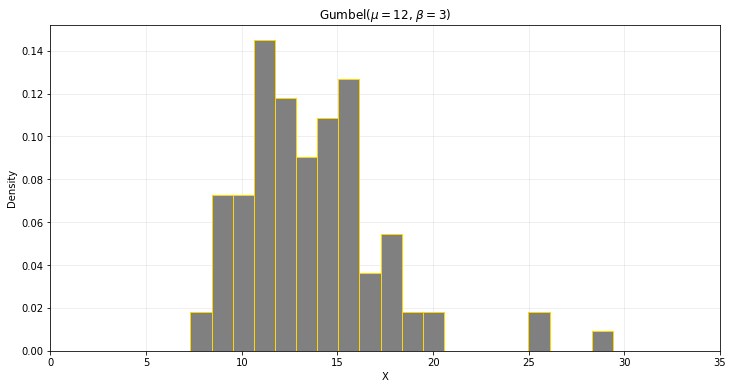

In [11]:
mu = 12
beta = 3
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)
print("The Mean is...{}".format(np.mean(x)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
plt.hist(x, color="grey",edgecolor="gold", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title(r'Gumbel($\mu=${}, $\beta=${})'.format(mu,beta))
plt.xlim([0,35])
plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=12$ and $\beta=3$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 99% confidence interval for the mean.

**PART B (Solution):**

Given that our random variable $X \sim Gum(\mu=12, \beta=3)$, then that means that our variance and the theoretical mean can be found with the following formulas.

First, let's find the theoretical mean.

$$\text{E}[X] = \mu + \beta \gamma = 12 + (3 \cdot 0.5772) = 13.7316$$

Now, our variance.

$$\text{Var}(X) = \frac{1}{6} \pi^2 \beta^2 = \frac{1}{6} \pi^2 (3^2) = 14.8044$$

Now we know that the mean that was given to us in Part A above was $\bar{X} \approx 13.695$.

So for that, a 99% confidence interval would look like the following.

$$\bar{X} \pm z_{0.01/2} \sqrt{\dfrac{\textrm{Var}(X)}{n}}$$

With the following variables.

$\text{Var}(X) = 14.8044$, $n=100$, and $z_{0.01/2} = \text{stats.norm.ppf}(0.995) = 2.576$

Now this gives us...

$$\text{CI} = [13.695 - (2.576\cdot \sqrt{\frac{14.8044}{100}}), \hspace{2mm} 13.695 + (2.576 \cdot \sqrt{\dfrac{14.8044}{100}})]$$

So, we get...

$$[12.401, 14.383] \checkmark$$

In [12]:
print("The Euler's Number is...{}".format(np.euler_gamma))
print("The Emperical Mean is...{}".format(np.mean(x)))
print("The Theoretical Mean is...{}".format(mu + (beta*np.euler_gamma)))
print("The Emperical Variance is...{}".format(np.var(x, ddof=1)))
print("The Theoretical Variance is...{}".format((np.pi*beta)**2/6))

The Euler's Number is...0.5772156649015329
The Emperical Mean is...13.695430162995866
The Theoretical Mean is...13.7316469947046
The Emperical Variance is...13.881871235729205
The Theoretical Variance is...14.804406601634037


**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 99% confidence interval of $[12.73,  14.72]$ for the mean of the $Gum(\mu=12, \beta=3)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 99% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=12, \beta=3)$ distribution, you could say there is a 99% chance that its true mean falls between 12.73 and 14.72.

**(ii)** If a class of 100 students all construct 99% confidence intervals for the mean of the $Gum(\mu=12, \beta=3)$ distribution, then we expect about 99 of their CIs to contain the true mean, and about 1 of them to miss the true mean.

**(iii)** There is a 99% probability that any given random variable sampled from $Gum(\mu=12, \beta=3)$ will be between 12.73 and 14.72.

**PART C (Solution):**

**(i)** $\underline{\text{FALSE}}$, it's claiming there's something significant about the $CI$ that we found when in reality there's nothing like that. You can't use a confidence level to gage anything about a certain interval.

**(ii)** $\underline{\text{TRUE}}$, because a confident interval of 99% is that. If you take a handful of confidence intervals that are 99%, then the assumption is that they capture the mean 99% of the time.

**(iii)** $\underline{\text{FALSE}}$, because confidence intervals are about sampling a mean of a distribution not a unique element from the population.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=12$ and $\beta=3$.  For each random sample, compute the 75% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

Proportion of the Confidence Interval:0.7500 


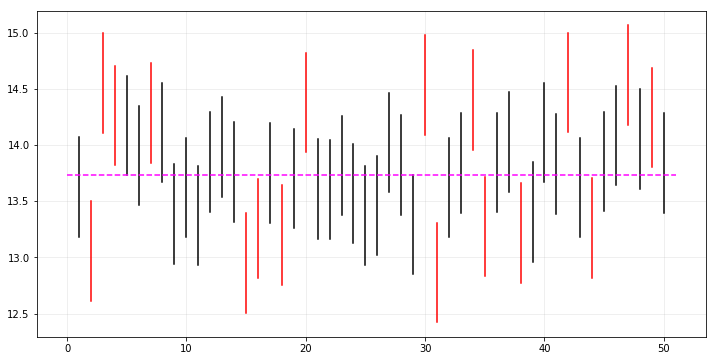

In [61]:
def confidence_intervals(m=500, n=100):
    #Declaring all the variables here!
    mu = 12
    beta = 3
    #Find the var
    v = ((np.pi*beta)**2)/6
    #Find the true mean.
    eX = mu + beta * np.euler_gamma
    #Find the standard deviation
    sE = np.sqrt(v/n)
    #Our Critical Value Variable
    zCrit = stats.norm.ppf((1-(1-0.75)/2))
    con_Interval = np.zeros((m,2))
    num = 0
    for i in range(m):
        res = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        x_bar = np.mean(res)
        #Finding the minimum and max on the confidence interval.
        conf_min = x_bar - zCrit * sE
        conf_max = x_bar + zCrit * sE
        #Adding it to the very first column
        con_Interval[i,0] = conf_min
        con_Interval[i,1] = conf_max
        if conf_min <= eX and eX <= conf_max:
            num += 1
        else:
            num += 0
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    #Here we are goint to get a random sampling for the lower bound and the upper bound.
    for each, row in enumerate(np.random.choice(range(m), size= 50, replace=False)):
        #We do the comparison to check and then set a color to be on the graph based off that.
        conf_min, conf_max = con_Interval[row,:]
        if conf_min <= eX and eX <= conf_max:
            color = "Black"
        else:
            color = "Red"
        #Plot the values.
        plt.plot([each+1, each+1], [conf_max, conf_min], color = color)
    #Plot the line as a dashed line.
    plt.plot([0,51], [eX, eX], color= "magenta", ls = "--")
    ax.grid(alpha=0.25)
#Output what you got.
    print("Proportion of the Confidence Interval:{:0.4f} ".format(num/m))
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

**PART E (Solution):**

Yes! In our trials ran above, the conclusion is that for $500$ independent confidence intervals, the $75$% confidence intervals included the mean $\approx{75}$% of the time, which is great because we know that a $75$% confidence interval should cover a true mean of our population about $75$% of the time, so in our results it hits that. $\checkmark$

---

<a id='p4'></a>
[Back to top](#top)

### [15 points] Problem 4 - Freethrow Throwbacks
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>Your Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russel fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

**SOURCES USED:**

1 - (CumSum in Python) https://www.geeksforgeeks.org/numpy-cumsum-in-python/

2 - (Shuffle) https://www.tutorialspoint.com/python/number_shuffle.htm

3 - (Zeros) https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html

4 - (Y-Lim) https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.get_ylim.html

5 - (Ones) https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html

6 - (Z-Order) https://matplotlib.org/3.1.1/gallery/misc/zorder_demo.html

7 - (Matplot Args) https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

The Mean of this Data Set is... 35.59
The Median of this Data Set is... 37.0
The Mode of this Data Set is... 40


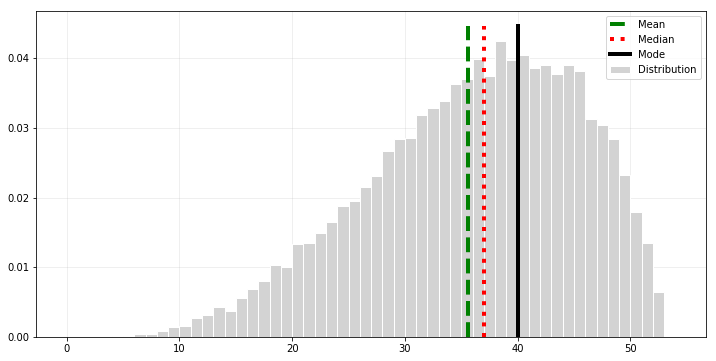

In [60]:
def shuffle(n_trials = 25000):
    #Going to hold result of n_trials
    res = np.zeros(n_trials,dtype=int)
    #Let's create our deck and shuffle over n_trials
    for i in range(n_trials):
        #0 will denote a normal card
        deckCards = np.array([0]*49+[1]*1+[2]*1+[3]*1+[4]*2)
        #We are going to shuffle our deck.
        np.random.shuffle(deckCards)
        #Declare our 6 of hearts to be in the deck of cards at 1
        six_Hearts = deckCards == 1
        #Declare our 8 of diamonds to be in the deck of cards at 2
        eight_Diamonds = deckCards == 2
        #Declare our King of Clubs to be in the deck of cards at 3
        king_Clubs = deckCards == 3
        #Declare our Joker to be 4th.
        jokers = deckCards ==4
        #Use the Cumulative Sum Function
        res[i] = np.where(np.cumsum(six_Hearts)+np.cumsum(eight_Diamonds)+np.cumsum(king_Clubs)+np.cumsum(jokers)==4)[0][0]
    return res
#Shuffle Function Call
ans = shuffle()
#Find the 3 things we wanted to know from this data set.
print("The Mean of this Data Set is... {:.2f}".format(np.mean(ans)))
print("The Median of this Data Set is... {}".format(np.median(ans)))
print("The Mode of this Data Set is... {}".format(stats.mode(x,axis=None).mode[0]))
#Now plot!
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
#Create the plot using Series
pd.Series(ans).hist(ax=ax, color="lightgrey", bins=np.arange(55), density=True, edgecolor="white", label="Distribution")
#Set Transparency
ax.grid(alpha=0.25)
#Set grid lines below
ax.set_axisbelow(True)
#Y-Axis view limits
y_lim = ax.get_ylim()
#Plot the mean using a dashed green line.
ax.plot(np.mean(x) * np.ones(2), y_lim, '--', color = 'green', zorder=2, lw=4, label="Mean")
#Plot the median using a dotted red line
ax.plot(np.median(x) * np.ones(2), y_lim, ':', color = 'red', zorder=2, lw=4, label="Median")
#Plot the mode in a solid black line
ax.plot(stats.mode(x,axis=None).mode[0] * np.ones(2), y_lim, color = 'black', zorder=2, lw=4, label="Mode")
ax.legend()

**PART A (Solution):**

The Plot above shape-wise is definitely a Bell Curve that also displays a $\underline{\text{Negatively Skewed Distribution}}$, with the mean, median, and mode all falling near the peak of the distribution, and a trail of values descending more towards the left than to the right. The mode seemed to be closest at the center of the peak, as it should be in a negative skew, with the mean and median to the left of it, the mean being furthest to the left of the mode. $\checkmark$

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

**PART B (Solution):**

A 99% confidence interval is wider, because a 99% confidence level refers to the including the true mean inside of it 99% of the time! That's why a 95% confidence level would be smaller, because that means it could be missing the mean more often than our 99% one. Think of it like filling up a water tank. The wider the tank, the more fishies it can hold! The smaller the tank, the smaller number of fishies you're gonna be able to fit. $\checkmark$

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by differant "statistical measures". Compute a 95% confidence interval for the _variance_.


**SOURCES USED:**

1 - (stats.chi2.ppf) https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

**PART C (Solution):**

Let's use code to calculate this.

In [47]:
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])
#Length of the Array
length = len(smith)
#Variable to hold the length-1 so I dont need to tediously write it over and over.
m = length-1
#Sample variance variable using ddof=1
samVar = np.var(smith, ddof=1)
#Alpha variable
a = 0.05;
#Finding the lower bound of the Conf. Interval
lowB = np.sqrt((m)*samVar/stats.chi2.ppf(1-a/2,m))
#Finding the Upper bound of the Conf. Interval
upB = np.sqrt((m)*samVar/stats.chi2.ppf(a/2,m))
#Output the Confidence Interval.
print("The Confidence Interval is... [{:.4f}, {:.4f}]".format(lowB,upB))

The Confidence Interval is... [0.1410, 0.3542]



***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


**PART D (Solution):**

Given that our alternative hypothesis is that the Carbon is below tolerance and unsafe, we want to be more on the rejection side, especially given we are dealing with airplane construction. It's better to be steer clear of any False Negatives and make sure nothing harmful makes it through, even if that means giving up the False Positives.

So, in essence, we want a $\underline{\text{Low, Type II Error Rate }} \checkmark$.


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

**PART E (Solution):**

Let $\bar{x}_{d}$ represent the average for Dumbo Octopus. Let $\bar{x}_{r}$ represent the average for Reef Octopus. Similarly, we will denote the same $d$ and $r$ subscripts for $\mu$ and $\sigma$.

We have Two Hypotheses.

$$H_0 \text{ : } \mu_2 - \mu_1 = 7$$

$$H_1 \text{ : } \mu_2 - \mu_1 > 7$$

$H_1$ is going to be our claim.

The CLT states we can solve the following problem like so.

$$\bar{x}_d - \bar{x}_r \text{ ~ } N(\mu_d - \mu_r, \frac{\sigma^2_d}{n_1} + \frac{\sigma^2_r}{n_2})$$

We can then simplify

$$\frac{\bar{x}_d - \bar{x}_r - 7}{\sqrt{\frac{\sigma^2_d}{n_1} + \frac{\sigma^2_r}{n_2}}} \text{ ~ } Z$$

We can plug in the values now and try and compute this.

$$\frac{63.9 - 47.2 - 7}{\sqrt{\frac{19.6^2}{65} + \frac{29.2^2}{49}}} \text{ ~ } Z$$

In [3]:
#Now we can compute this.
top = (63.9 - 47.2 - 7)
firstTerm = (19.6**2)/65
secondTerm = (29.2**2)/49
denom = np.sqrt(firstTerm + secondTerm)
z = (top/denom)
print("z is... {:.2f}".format(z))
zCritical = stats.norm.ppf(0.975)
print("z critical is...{:.3f}".format(zCritical))

z is... 2.01
z critical is...1.960


So z $ = 2.01$, which is > than zCritical, but let's also do the p-value test.

In [4]:
p =  (1 - stats.norm.cdf(z))
print("Our p-value is...{:.3f}".format(p))

Our p-value is...0.022


So given that our p-value is LESS than our alpha, in other words, $p \text{ < } 0.025$, we  reject our $H_0$, and there is now thorough evidence to support our claim! $\checkmark$